In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

In [143]:
df = pd.read_csv('dataset/supermarket_sales.csv')

In [144]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby('Date').agg({
    'Quantity': 'sum'       # Sum of quantity sold
})
df = pd.DataFrame(df)
df['Time'] = np.arange(len(df.index))

In [145]:
df.head(10)

,Quantity,Time
Date,,
2019-01-01,81,0
2019-01-02,48,1
2019-01-03,37,2
2019-01-04,32,3
2019-01-05,55,4
2019-01-06,52,5
2019-01-07,53,6
2019-01-08,95,7
2019-01-09,58,8


<Axes: xlabel='Time', ylabel='Quantity'>

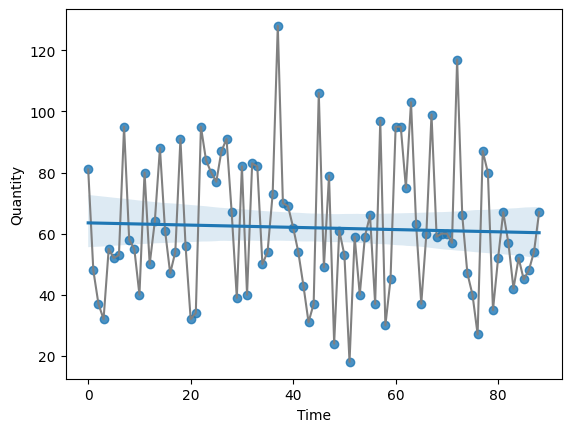

In [146]:
sns.lineplot(data = df, x = df.Time, y = df.Quantity, color = '0.50')
sns.regplot(data = df, x = df.Time, y = df.Quantity)

In [147]:
X = df[['Time']].iloc[:-10]
Y = df['Quantity'].iloc[:-10]

In [148]:
X

,Time
Date,
2019-01-01,0
2019-01-02,1
2019-01-03,2
2019-01-04,3
2019-01-05,4
...,...
2019-03-16,74
2019-03-17,75
2019-03-18,76


In [149]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [150]:
with open("model/model_01.pickle", 'wb') as f:
    pickle.dump(model, f)

In [151]:
print("y = ", model.coef_[0], "x + ", model.intercept_)

y =  0.05396786757546246 x +  61.07246835443038


In [152]:
df['Prediction'] = pd.Series(model.predict(X), index = X.index)
df.tail(20)

,Quantity,Time,Prediction
Date,,,
2019-03-11,60,69,64.796251
2019-03-12,60,70,64.850219
2019-03-13,57,71,64.904187
2019-03-14,117,72,64.958155
2019-03-15,66,73,65.012123
2019-03-16,47,74,65.066091
2019-03-17,40,75,65.120058
2019-03-18,27,76,65.174026
2019-03-19,87,77,65.227994


In [153]:
mse = mean_squared_error(Y, df['Prediction'].iloc[:-10])
print(np.sqrt(mse))

23.037084089647845


In [154]:
X2 = df[['Time']].iloc[-10:]
Y2 = df['Quantity'].iloc[-10:]

In [155]:
X2

,Time
Date,
2019-03-21,79
2019-03-22,80
2019-03-23,81
2019-03-24,82
2019-03-25,83
2019-03-26,84
2019-03-27,85
2019-03-28,86
2019-03-29,87


In [156]:
with open("model/model_01.pickle", 'rb') as f:
    model_new = pickle.load(f)

model_new.coef_ = model.coef_
model_new.intercept_ = model.intercept_

In [157]:
print("y' = ", model_new.coef_[0], "x + ", model_new.intercept_)

y' =  0.05396786757546246 x +  61.07246835443038


In [158]:
model_new.fit(X2, Y2)

LinearRegression()

In [159]:
print("y' = ", model_new.coef_[0], "x + ", model_new.intercept_)

y' =  1.096969696969697 x +  -39.696969696969695


In [160]:
df['Prediction'] = pd.Series(model_new.predict(X2), index = X2.index)
df.tail(20)

,Quantity,Time,Prediction
Date,,,
2019-03-11,60,69,NaN
2019-03-12,60,70,NaN
2019-03-13,57,71,NaN
2019-03-14,117,72,NaN
2019-03-15,66,73,NaN
2019-03-16,47,74,NaN
2019-03-17,40,75,NaN
2019-03-18,27,76,NaN
2019-03-19,87,77,NaN


In [161]:
mse = mean_squared_error(Y2, df['Prediction'].iloc[-10:])
print(np.sqrt(mse))

9.130302527431622
